In [49]:
from sklearn.decomposition import PCA
import numpy as np
from numpy import *

X=np.array([[-1,-1],[-2,-1],[-3,-2],[1,1],[2,1],[3,2]])
#pca=PCA(n_components=2)
pca=PCA(n_components='mle')
pca.fit(X)
print(pca.explained_variance_ratio_)

[0.99244289]


[[10.235186 11.321997]
 [10.122339 11.810993]
 [ 9.190236  8.904943]
 ...
 [ 9.854922  9.201393]
 [ 9.11458   9.134215]
 [10.334899  8.543604]]
特征值是：
[[-2.51033597e+00]
 [-2.86915379e+00]
 [ 9.74108510e-02]
 [-7.67782222e-01]
 [ 1.02715333e+00]
 [-1.44409178e+00]
 [-2.17360352e+00]
 [-7.73998803e-01]
 [-1.09983463e+00]
 [-1.70275987e+00]
 [-5.39605615e-01]
 [-9.15572638e-01]
 [-2.42669452e+00]
 [ 2.93613464e+00]
 [ 3.92702506e-01]
 [ 2.59205734e+00]
 [ 4.96435625e-01]
 [-1.52069930e+00]
 [ 1.25471104e-01]
 [ 1.41846162e+00]
 [ 5.89902904e-01]
 [ 6.69601540e-01]
 [ 3.25466068e-01]
 [ 1.18812333e+00]
 [ 2.07790920e+00]
 [ 3.24938650e-01]
 [ 3.41109884e+00]
 [ 1.92249899e+00]
 [-6.57788287e-01]
 [-3.56836313e-01]
 [ 5.72240108e-02]
 [ 1.13444036e+00]
 [-2.47196176e-01]
 [ 1.14678135e+00]
 [ 1.62503940e+00]
 [-2.11489136e+00]
 [ 1.62262452e+00]
 [ 1.56716102e+00]
 [ 2.08128929e+00]
 [-1.87248397e+00]
 [-2.59122644e-01]
 [ 3.27554269e+00]
 [-5.23125148e-01]
 [-9.49849182e-02]
 [ 2.36167252e

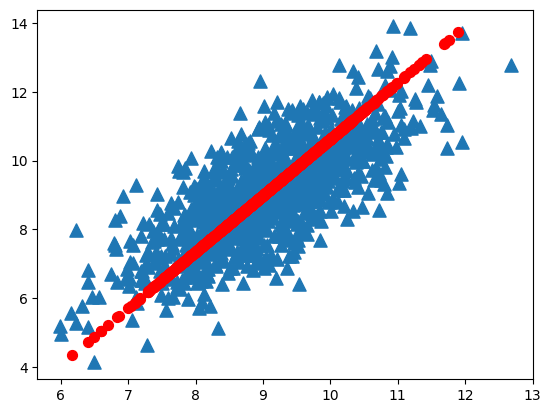

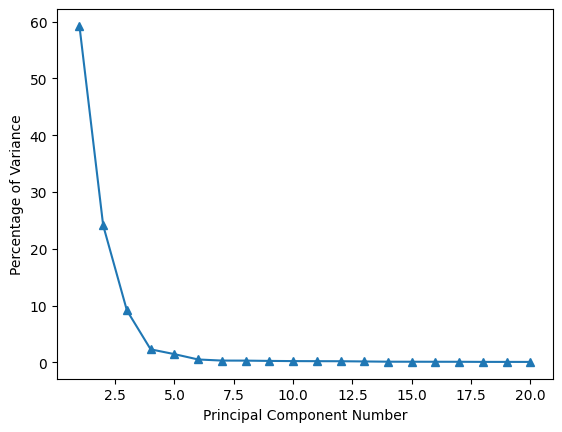

In [25]:
import numpy as np
import matplotlib.pyplot as plt


def loadDataSet(filename, delim='\t'):
    fr = open(filename)
    StringArr = [line.strip().split(delim) for line in fr.readlines()]
    datArr = [list(map(float, line)) for line in StringArr]
    return np.mat(datArr)


def pca(dataMat, topNfeat=9999999):
    meanVals = np.mean(dataMat, axis=0)
    meanRemoved = dataMat - meanVals 
    covMat = np.cov(meanRemoved, rowvar=0)  # 寻找方差最大的方向a,Var(a'X)=a'Cov(X)a方向误差最大
    eigVals, eigVects = np.linalg.eig(np.mat(covMat))
    eigValInd = np.argsort(eigVals)  
    eigValInd = eigValInd[:-(topNfeat + 1):-1]  
    redEigVects = eigVects[:, eigValInd]  
    lowDDataMat = meanRemoved * redEigVects  
    reconMat = (lowDDataMat * redEigVects.T) + meanVals
    return lowDDataMat, reconMat


dataMat = loadDataSet( 'testSet.txt')
print(dataMat)
lowDMat, recoMat = pca(dataMat, 1)
print(u'特征值是：')
print(lowDMat)
print(u'特征向量是：')
print(recoMat)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(np.array(dataMat[:, 0]),np.array(dataMat[:, 1]), marker='^', s=90)
ax.scatter(np.array(recoMat[:, 0]), np.array(recoMat[:, 1]), marker='o', s=50, c='red')
plt.show()


def replaceNanWithMean():
    datMat = loadDataSet('secom.data', ' ')
    numFeat = np.shape(datMat)[1]
    for i in range(numFeat):
        meanVal = np.mean(datMat[np.nonzero(~np.isnan(datMat[:, i].A))[0], i])
        datMat[np.nonzero(np.isnan(datMat[:, i].A))[0], i] = meanVal
    return datMat


dataMat = replaceNanWithMean()
meanVals = np.mean(dataMat, axis=0)
meanRemoved = dataMat - meanVals 
covMat = np.cov(meanRemoved, rowvar=0)
eigVals, eigVects = np.linalg.eig(np.mat(covMat))
eigValInd = np.argsort(eigVals) 
eigValInd = eigValInd[::-1]  
sortedEigVals = eigVals[eigValInd]
total = sum(sortedEigVals)
varPercentage = sortedEigVals / total * 100
# 计算主成分方差
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(1, 21), varPercentage[:20], marker='^')
plt.xlabel('Principal Component Number')
plt.ylabel('Percentage of Variance')
plt.show()

In [50]:
def loadDataSet(fileName, delim='\t'):
    fr = open(fileName)
    stringArr = [line.strip().split(delim) for line in fr.readlines()]
    datArr = [list(map(float,line)) for line in stringArr]
    return mat(datArr)

In [51]:
def pca1(dataMat, topNfeat=9999999):
    meanVals = mean(dataMat, axis=0)
    meanRemoved = dataMat - meanVals
    covMat = cov(meanRemoved, rowvar=0)#计算去均值后的数据矩阵的协方差矩阵
    eigVals,eigVects = linalg.eig(mat(covMat))
    eigValInd = argsort(eigVals)            #对特征值从大到小排序
    eigValInd = eigValInd[:-(topNfeat+1):-1] 
    redEigVects = eigVects[:,eigValInd]      
    lowDDataMat = meanRemoved * redEigVects
    reconMat = (lowDDataMat * redEigVects.T) + meanVals
    return lowDDataMat, reconMat

In [52]:
# 降到二维的情况
dataMat = loadDataSet('testSet.txt')
lowDMat, reconMat = pca1(dataMat, 2)

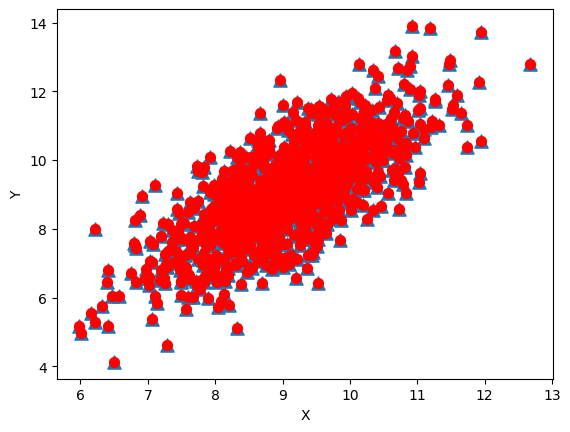

In [53]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(dataMat[:,0].flatten().A[0], dataMat[:,1].flatten().A[0], marker='^', s=90)
ax.scatter(reconMat[:,0].flatten().A[0], reconMat[:,1].flatten().A[0], marker='o', s=50, c='red')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

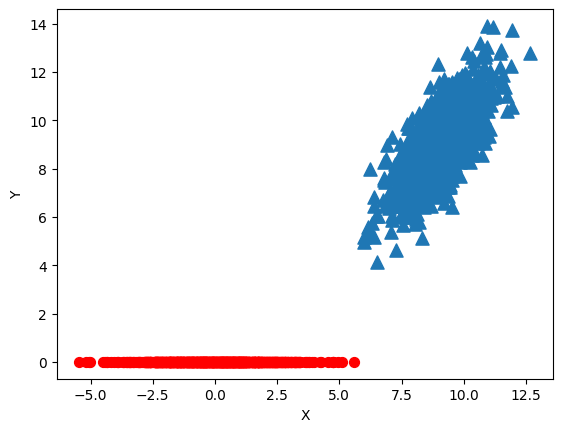

In [54]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(dataMat[:,0].flatten().A[0], dataMat[:,1].flatten().A[0], marker='^', s=90)
ax.scatter(lowDMat[:,0].flatten().A[0], zeros(lowDMat.shape[0]), marker='o', s=50, c='red')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

In [27]:
import pandas as pd 
import numpy as np 
from sklearn.decomposition import PCA

# 读取半导体制造数据 
secom_data = pd.read_csv('secom.data', sep=' ', header=None)
secom_labels = pd.read_csv('secom_labels.data', sep=' ', header=None)

# 缺失值用平均值填充
secom_data = secom_data.fillna(secom_data.mean())

# PCA降维
pca = PCA(n_components=20) # 选择前20个主成分
secom_reduced = pca.fit_transform(secom_data)

# 输出PCA的信息
print("PCA explained variance ratio:", pca.explained_variance_ratio_)
print("PCA explained variance:", pca.explained_variance_)
print("PCA singular values:", pca.singular_values_)

# 将PCA降维后的数据转化为DataFrame并保存
secom_reduced_df = pd.DataFrame(secom_reduced)
secom_reduced_df.to_csv('secom_reduced.csv')


PCA explained variance ratio: [0.59254058 0.24123819 0.09150014 0.02300579 0.01459192 0.00518818
 0.00322658 0.00314677 0.0026308  0.00231307 0.00217535 0.00207282
 0.00169084 0.00125591 0.00120353 0.00114092 0.00111115 0.00092458
 0.00090503 0.00086145]
PCA explained variance: [53415197.85687514 21746671.9046592   8248376.61529074  2073880.85929396
  1315404.3877583    467693.55734419   290863.55541772   283668.60065106
   237155.82977109   208513.83582166   196098.84856258   186856.54901858
   152422.35398702   113215.03194593   108493.84801627   102849.53277222
   100166.16404762    83347.33990745    81585.05645529    77656.04569282]
PCA singular values: [289219.98520826 184540.7494368  113652.79486025  56988.57276379
  45386.37759537  27063.03957062  21342.26622887  21076.64652215
  19271.37850341  18070.21491009  17524.00630133  17106.06195952
  15449.70570411  13315.20709667  13034.62182012  12691.03495863
  12524.38473134  11424.61965647  11303.19416842  11027.66373966]


In [28]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


In [29]:
# 导入数据集
digits = load_digits()
train = digits.data
target = digits.target
x_train,x_test,y_train,y_true = train_test_split(train,target,test_size=0.2,random_state=33)


In [30]:
# 去均值和方差归一化 
ss = StandardScaler()   
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)


In [31]:
#对未降维的数据进行分类
svc = SVC(kernel='rbf') #使用支持向量机进行分类，核函数采用径向基核函数
svc.fit(x_train,y_train)
y_predict = svc.predict(x_test)
print("The Accuraracy of SVC is:",svc.score(x_test,y_true))
print("classification report of SVC\n",classification_report(y_true,y_predict,target_names=digits.target_names.astype(str)))


The Accuraracy of SVC is: 0.9888888888888889
classification report of SVC
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.98      1.00      0.99        46
           2       1.00      0.97      0.99        37
           3       1.00      1.00      1.00        39
           4       0.96      1.00      0.98        25
           5       0.97      0.97      0.97        37
           6       0.98      1.00      0.99        41
           7       1.00      1.00      1.00        29
           8       1.00      0.98      0.99        44
           9       1.00      0.97      0.98        33

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [34]:
#PCA降维，并对数据进行分类
pca = PCA(n_components=10,whiten=True)
pca.fit(x_train,y_train)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)
svc = SVC(kernel='rbf')
svc.fit(x_train_pca,y_train)
y_pre_svc = svc.predict(x_test_pca)
print("The Accuraracy of PCA_SVC is:",svc.score(x_test_pca,y_true))
print("classification report of PCA_SVC\n",classification_report(y_true,y_pre_svc,target_names=digits.target_names.astype(str)))


The Accuraracy of PCA_SVC is: 0.95
classification report of PCA_SVC
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.98      0.98      0.98        46
           2       1.00      1.00      1.00        37
           3       0.92      0.85      0.88        39
           4       1.00      0.96      0.98        25
           5       0.90      0.95      0.92        37
           6       0.98      1.00      0.99        41
           7       0.97      1.00      0.98        29
           8       0.89      0.89      0.89        44
           9       0.91      0.91      0.91        33

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



[0.9793978895096214, 0.9810769708255742, 0.9777281191806331, 0.9760738671632525, 0.9788547486033521, 0.9777374301675978, 0.975505896958411, 0.9760738671632527, 0.9777467411545624, 0.9799720670391061]


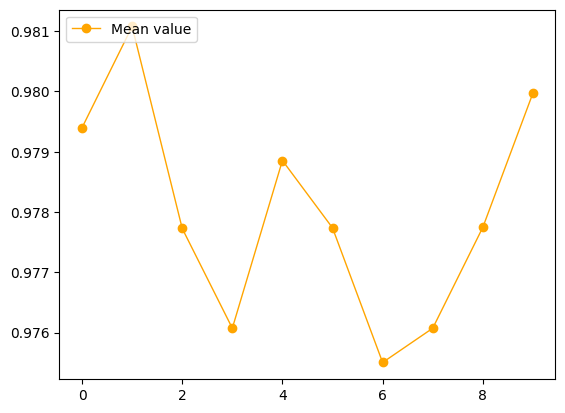

In [35]:
#十折交叉验证
epochs = 10
train_pca = pca.fit_transform(train)    #用train来训练PCA模型，同时返回降维后的数据
x = [i for i in range(10)]
scores = []
cv = KFold(n_splits=10,shuffle=True)    #定义10折交叉验证
for i in range(epochs):
    score = cross_val_score(svc, train_pca, target, cv=cv).mean()  #降维前
    scores.append(score)
print(scores)   
plt.plot(x, scores, linewidth=1, color="orange", marker="o",label="Mean value")
plt.legend(["Mean value"],loc="upper left")#设置线条标识
plt.show()


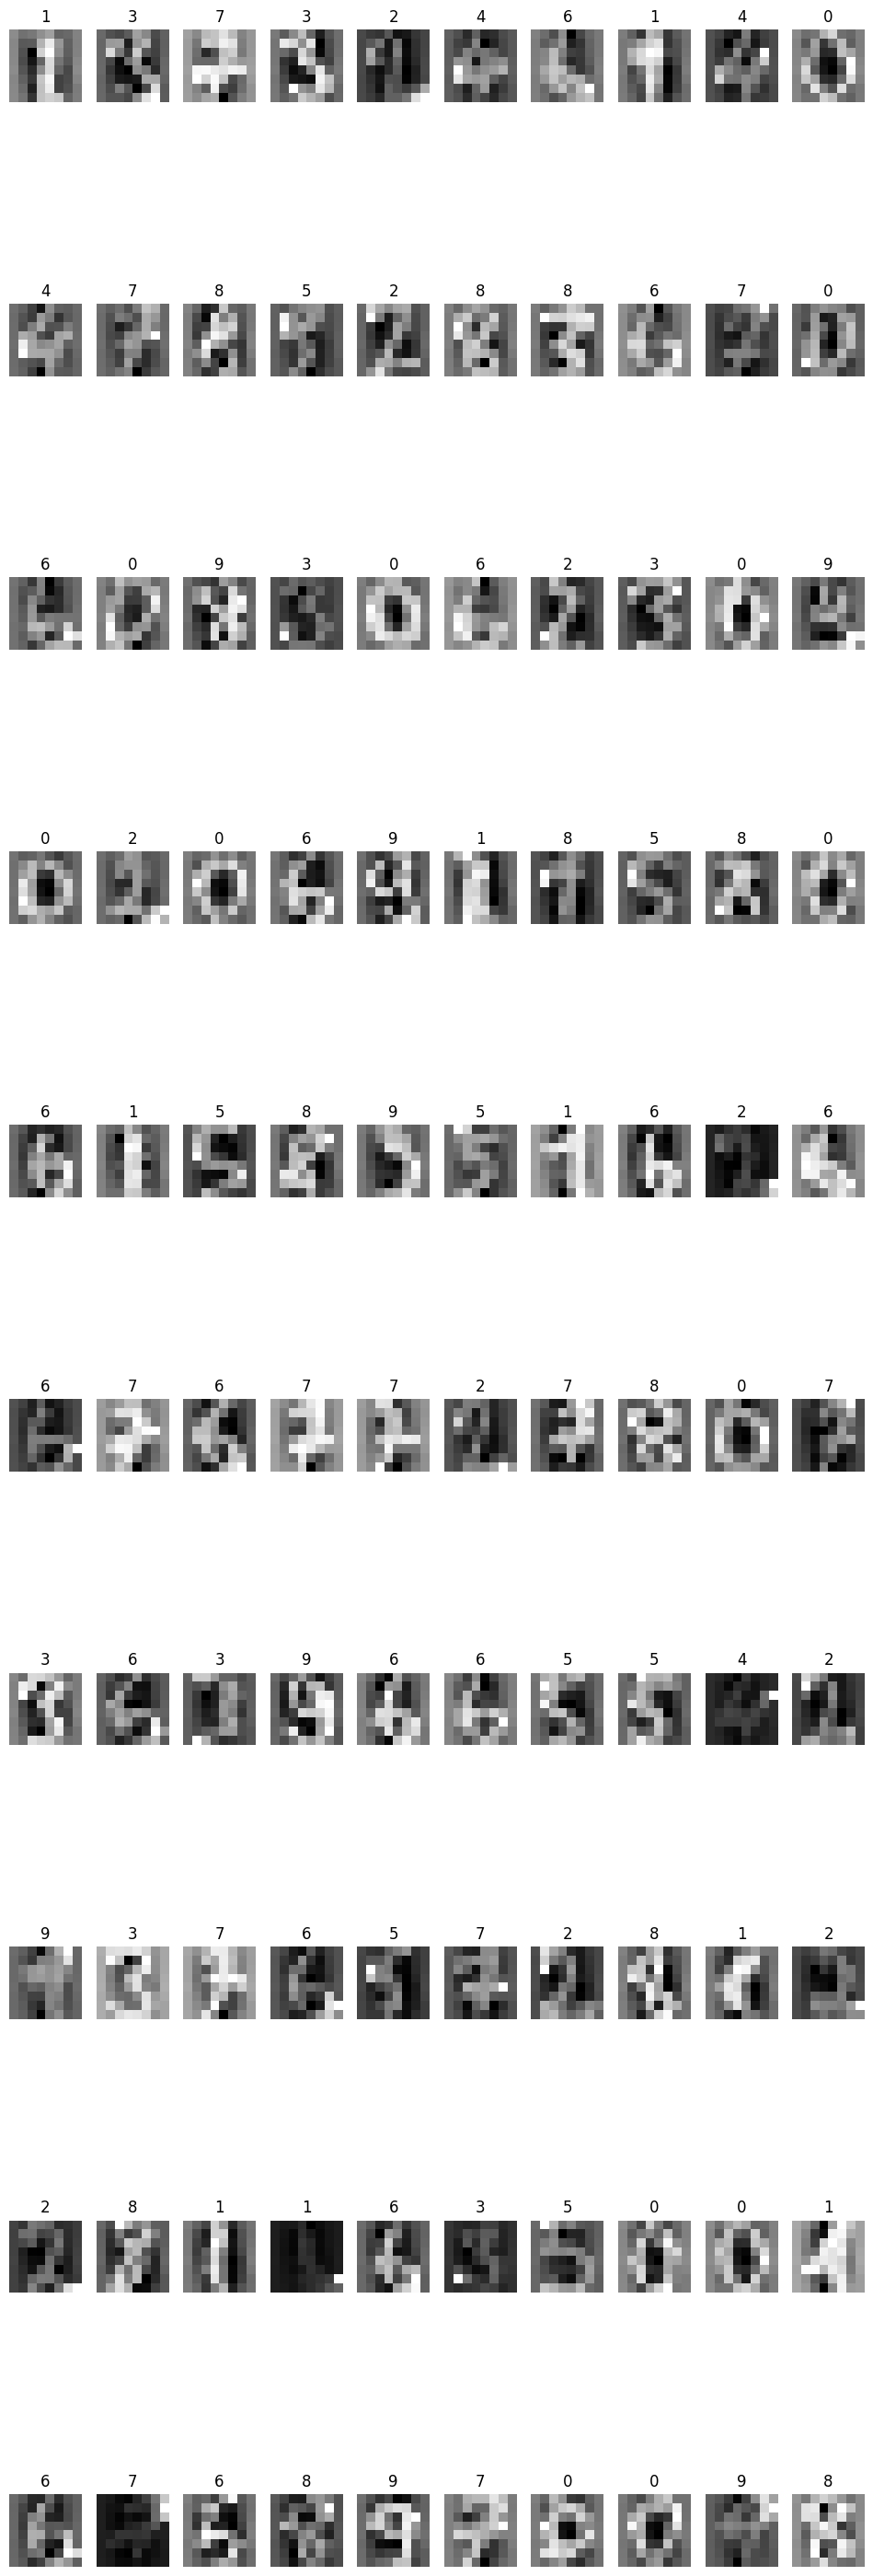

In [36]:
#绘图
samples = x_test[:100]  #取前100个数据
y_pre = y_pre_svc[:100]
plt.figure(figsize=(12,38)) #确定图形的大小
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.imshow(samples[i].reshape(8,8),cmap='gray')
    title = str(y_pre[i])
    plt.title(title)
    plt.axis('off')
plt.show()


In [37]:
import numpy as np
class PCA():
    def __init__(self,n_components):
        self.n_components = n_components  #降维的维度数
    def fit_transform(self,X):
        self.n_features_ = X.shape[1]  #数组的列数
        # 求协方差矩阵
        X = X - X.mean(axis=0)  #计算每一列的均值
        self.covariance = np.dot(X.T,X)/X.shape[0]  # np.dot 矩阵乘法  shape[0]数组的行数
        print("协方差矩阵为：\n",self.covariance)
       # 求协方差矩阵的特征向量和特征值
        eig_vals,eig_vectors = np.linalg.eig(self.covariance) #求特征值和特征向量的接口
        print("协方差矩阵的特征值是：\n",eig_vals)
        print("协方差矩阵的特征向量是：\n", eig_vectors)
        # 获得降序排列特征值的序号
        idx = np.argsort(-eig_vals)
        print("特征值从大到小排序的序列号是：\n",idx)
        self.n_components_ = eig_vectors[:,idx[:self.n_components]]  #降维矩阵
        print("降维矩阵为：\n",self.n_components_)
        return np.dot(X,self.n_components_)
 
pca = PCA(n_components=2)
X = np.array([[-1,2,66,-1],[-2,6,58,-1],[-3,8,45,-2],[1,9,36,1],[2,10,62,1],[3,5,83,2]])
newX = pca.fit_transform(X)
print("降维后的数据是：\n",newX)  #输出降维后的数据

协方差矩阵为：
 [[  4.66666667   1.          15.33333333   3.        ]
 [  1.           7.22222222 -22.38888889   0.83333333]
 [ 15.33333333 -22.38888889 226.22222222   8.33333333]
 [  3.           0.83333333   8.33333333   2.        ]]
协方差矩阵的特征值是：
 [2.29818395e+02 8.15945022e+00 3.94455108e-02 2.09382072e+00]
协方差矩阵的特征向量是：
 [[ 0.06761155  0.60143206  0.56775502  0.55799856]
 [-0.09934165  0.68922828 -0.01302825 -0.71758336]
 [ 0.99207082  0.01304165 -0.00945517 -0.1246435 ]
 [ 0.03681576  0.40382394 -0.82304016  0.39771311]]
特征值从大到小排序的序列号是：
 [0 1 3 2]
降维矩阵为：
 [[ 0.06761155  0.60143206]
 [-0.09934165  0.68922828]
 [ 0.99207082  0.01304165]
 [ 0.03681576  0.40382394]]
降维后的数据是：
 [[  7.96504337  -4.12166867]
 [ -0.43650137  -2.07052079]
 [-13.63653266  -1.86686164]
 [-22.28361821   2.32219188]
 [  3.47849303   3.95193502]
 [ 24.91311585   1.78492421]]


In [38]:
import numpy as np
from numpy import array

In [39]:
A = np.linspace(0, 14, 15).reshape((3, -1))
A


array([[ 0.,  1.,  2.,  3.,  4.],
       [ 5.,  6.,  7.,  8.,  9.],
       [10., 11., 12., 13., 14.]])

In [41]:
def SVD(A, n):
    M = np.dot(A, A.T)
    eigval, eigvec = np.linalg.eig(M)
    indexes = np.argsort(-eigval)[:n]
    U = eigvec[:, indexes]
    sigma_sq = eigval[indexes]
    M = np.dot(A.T, A)
    eigval, eigvec = np.linalg.eig(M)
    indexes = np.argsort(-eigval)[:n]
    V = eigvec[:, indexes]
    sigma = np.diag(np.sqrt(sigma_sq))
#     print(sigma)
    return np.dot(np.dot(U, sigma), V.T)


In [42]:
A_ = SVD(A, 2)
A_


array([[ 3.39961756,  2.86467774,  2.32973792,  1.7947981 ,  1.25985827],
       [ 6.07431668,  6.58925875,  7.10420082,  7.61914289,  8.13408497],
       [ 8.74901579, 10.31383976, 11.87866373, 13.44348769, 15.00831166]])

In [44]:
np.linalg.norm(A_ - A)

5.456648481882112

In [45]:
import numpy as np
class PCA():
    def __init__(self,n_components):
        self.n_components = n_components  #降维的维度数
    def fit_transform(self,X):
        self.n_features_ = X.shape[1]  #数组的列数
        # 求协方差矩阵
        X = X - X.mean(axis=0)  #计算每一列的均值
        self.covariance = np.dot(X.T,X)/X.shape[0]  # np.dot 矩阵乘法  shape[0]数组的行数
        print("协方差矩阵为：\n",self.covariance)
       # 求协方差矩阵的特征向量和特征值
        eig_vals,eig_vectors = np.linalg.eig(self.covariance) #求特征值和特征向量的接口
        print("协方差矩阵的特征值是：\n",eig_vals)
        print("协方差矩阵的特征向量是：\n", eig_vectors)
        # 获得降序排列特征值的序号
        idx = np.argsort(-eig_vals)
        print("特征值从大到小排序的序列号是：\n",idx)
        self.n_components_ = eig_vectors[:,idx[:self.n_components]]  #降维矩阵
        print("降维矩阵为：\n",self.n_components_)
        return np.dot(X,self.n_components_)
 
pca = PCA(n_components=4)#调参
X = np.array([[-1,2,66,-1],[-2,6,58,-1],[-3,8,45,-2],[1,9,36,1],[2,10,62,1],[3,5,83,2]])
newX = pca.fit_transform(X)
print("降维后的数据是：\n",newX)  #输出降维后的数据

协方差矩阵为：
 [[  4.66666667   1.          15.33333333   3.        ]
 [  1.           7.22222222 -22.38888889   0.83333333]
 [ 15.33333333 -22.38888889 226.22222222   8.33333333]
 [  3.           0.83333333   8.33333333   2.        ]]
协方差矩阵的特征值是：
 [2.29818395e+02 8.15945022e+00 3.94455108e-02 2.09382072e+00]
协方差矩阵的特征向量是：
 [[ 0.06761155  0.60143206  0.56775502  0.55799856]
 [-0.09934165  0.68922828 -0.01302825 -0.71758336]
 [ 0.99207082  0.01304165 -0.00945517 -0.1246435 ]
 [ 0.03681576  0.40382394 -0.82304016  0.39771311]]
特征值从大到小排序的序列号是：
 [0 1 3 2]
降维矩阵为：
 [[ 0.06761155  0.60143206  0.55799856  0.56775502]
 [-0.09934165  0.68922828 -0.71758336 -0.01302825]
 [ 0.99207082  0.01304165 -0.1246435  -0.00945517]
 [ 0.03681576  0.40382394  0.39771311 -0.82304016]]
降维后的数据是：
 [[  7.96504337  -4.12166867   1.43741053   0.24359399]
 [ -0.43650137  -2.07052079  -0.9937735   -0.30063265]
 [-13.63653266  -1.86686164  -1.76428642   0.05151323]
 [-22.28361821   2.32219188   2.06505529  -0.0745189 ]
 [  3.